# 第十五章 再谈编程

## 15.1 Python之禅

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


* Beautiful is better than ugly

整齐、易读胜过混乱、晦涩

* Simple is better than complex

简约胜过复杂

* Complex is better than complicated

复杂胜过晦涩

* Flat is better than nested

扁平胜过嵌套

* Now is better than never.
  
* Although never is often better than *right* now.

理解一：先行动起来，编写行之有效的代码，不要企图一开始就编写完美无缺的代码

理解二：做比不做要好，但是盲目的不加思考的去做还不如不做

* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.

如果方案很难解释，很可能不是有一个好的方案，反之亦然

【个人感悟】

1、首先要行动起来，编写行之有效的代码；
  
2、如果都能解决问题，选择更加简单的方案；
  
3、整齐、易读、可维护性、可扩展性好；
  
4、强壮、健壮、鲁棒性好；
  
5、响应速度快，占用空间少。

**有些时候，鱼和熊掌不可兼得，根据实际情况进行相应的取舍**

## 15.2  时间复杂度分析

**【1】代数分析**

**求最大值和排序**

In [3]:
import numpy as np
x = np.random.randint(100, size=10)
x

array([13, 14, 33, 79, 18, 26, 17, 65, 87, 63])

* 寻找最大值的时间复杂度为O(n)

* 选择排序时间复杂度O(n^2)

**代数分析**

In [5]:
def one(x):
    """常数函数"""
    return np.ones(len(x))

def log(x):
    """对数函数"""
    return np.log(x)

def equal(x):
    """线性函数"""
    return x

def n_logn(x):
    """nlogn函数"""
    return x*np.log(x)

def square(x):
    """平方函数"""
    return x**2

def exponent(x):
    """指数函数"""
    return 2**x

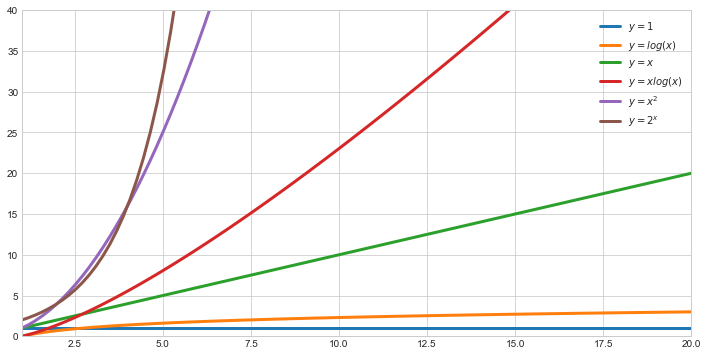

In [6]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

t = np.linspace(1, 20, 100)
methods = [one, log, equal, n_logn, square, exponent]
method_labels = ["$y = 1$", "$y = log(x)$", "$y = x$", "$y = xlog(x)$", "$y = x^2$", "$y = 2^x$"]
plt.figure(figsize=(12, 6))
for method, method_label in zip(methods, method_labels):
    plt.plot(t, method(t), label=method_label, lw=3)
plt.xlim(1, 20)
plt.ylim(0, 40)
plt.legend()

**我们的最爱：常数函数和对数函数**
  
**勉强接受：线性函数和nlogn函数**
  
**难以承受：平方函数和指数函数**

**【2】三集不相交问题**

问题描述：
假设有A、B、C三个序列，任一序列内部没有重复元素，欲知晓三个序列交集是否为空

In [18]:
import random
def creat_sequence(n):
    A = random.sample(range(1, 1000), k=n)
    B = random.sample(range(1000, 2000), k=n)
    C = random.sample(range(2000, 3000), k=n)
    return A, B, C

In [20]:
A, B, C = creat_sequence(100)
def no_intersection_1(A, B, C):
    for a in A:
        for b in B:
            for c in C:
                if a == b == c:
                    return False
    return True

%timeit no_intersection_1(A, B, C)
no_intersection_1(A, B, C)

36.7 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


True

In [21]:
def no_intersection_2(A, B, C):
    for a in A:
        for b in B:
            if a == b:
                for c in C:
                    if a == c:
                        return False
    return True

%timeit no_intersection_2(A, B, C)

301 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
import time

res_n_3 = []
res_n_2 = []

for n in [10, 20, 100]:
    A, B, C = creat_sequence(n)
    start_1 = time.time()
    for i in range(100):
        no_intersection_1(A, B, C)
    end_1 = time.time()
    for i in range(100):
        no_intersection_2(A, B, C)
    end_2 = time.time()
    res_n_3.append(str(round((end_1 - start_1)*1000))+"ms")
    res_n_2.append(str(round((end_2 - end_1)*1000))+"ms")

print("{0:<23}{1:<15}{2:<15}{3:<15}".format("方法", "n=10", "n=20", "n=100"))
print("{0:<25}{1:<15}{2:<15}{3:<15}".format("no_inte rsection_1", *res_n_3))
print("{0:<25}{1:<15}{2:<15}{3:<15}".format("no_intersection_2", *res_n_2))

方法                     n=10           n=20           n=100          
no_inte rsection_1       6ms            42ms           4001ms         
no_intersection_2        0ms            1ms            24ms           


**【3】元素唯一性问题**

问题描述：A 中的元素是否唯一

In [23]:
def unique_1(A):
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[i] == A[j]:
                return False
    return True

In [24]:
def unique_2(A):
    A_sort = sorted(A)
    for i in range(len(A_sort)-1):
            if A[i] == A[i+1]:
                return False
    return True

In [25]:
import random
res_n_2 = []
res_n_log_n = []

for n in [100, 1000]:
    A = list(range(n))
    random.shuffle(A)
    start_1 = time.time()
    for i in range(100):
        unique_1(A)
    end_1 = time.time()
    for i in range(100):
        unique_2(A)
    end_2 = time.time()
    res_n_2.append(str(round((end_1 - start_1)*1000))+"ms")
    res_n_log_n.append(str(round((end_2 - end_1)*1000))+"ms")

print("{0:<13}{1:<15}{2:<15}".format("方法", "n=100", "n=1000"))
print("{0:<15}{1:<15}{2:<15}".format("unique_1", *res_n_2))
print("{0:<15}{1:<15}{2:<15}".format("unique_2", *res_n_log_n))

方法           n=100          n=1000         
unique_1       49ms           4044ms         
unique_2       1ms            21ms           


**【4】第n个斐波那契数**

a(n+2) = a(n+1) + a(n)

In [150]:
def bad_fibonacci(n):
    if n <= 1:
        return n
    else:
        return  bad_fibonacci(n-2)+ bad_fibonacci(n-1)

O(2^n)

In [134]:
def good_fibonacci(n):
    i, a, b = 0, 0, 1
    while i < n:
        a, b = b, a+b
        i += 1
    return a

3

O(n)

In [151]:
%timeit  bad_fibonacci(10)

20.6 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [154]:
%timeit good_fibonacci(10)

875 ns ± 24.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**【5】最大盛水容器（leetcode第11题）**

**暴力求解——双循环**

In [27]:
def max_area_double_cycle(height):
    """暴力穷举双循环"""
    i_left, i_right, max_area = 0,0,0
    for i in range(len(height)-1):
        for j in range(i+1, len(height)):
            area = (j-i) * min(height[j], height[i])
            if area > max_area:
                i_left, i_right, max_area = i, j, area
    return  i_left, i_right, max_area

In [30]:
height = np.random.randint(1, 50, size=10)
print(height)
max_area_double_cycle(height)

[10 11 41 26  2 44 26 43 36 30]


(2, 8, 216)

([<matplotlib.axis.XTick at 0x22728e01b00>,
 <a list of 10 Text xticklabel objects>)

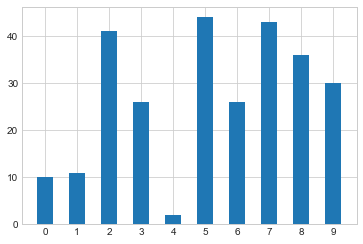

In [44]:
import matplotlib.pyplot as plt

plt.bar(range(10), height, width=0.5)
plt.xticks(range(0, 10, 1))

**双向指针**

In [46]:
def max_area_bothway_points(height):
    """双向指针法"""
    
    i = 0
    j = len(height)-1
    i_left, j_right, max_area=0, 0, 0
    while i < j:
        area = (j-i) * min(height[i], height[j])
        if area > max_area:
            i_left, j_right, max_area = i, j, area
        if height[i] == min(height[i], height[j]):
            i += 1
        else:
            j -= 1
    return i_left, j_right, max_area

In [47]:
 max_area_bothway_points(height)

(2, 8, 216)

In [48]:
double_cycle = []
bothway_points = []

for n in [5, 50, 500]:
    height = np.random.randint(1, 50, size=n)
    start_1 = time.time()
    for i in range(100):
        max_area_double_cycle(height)
    end_1 = time.time()
    for i in range(100):
        max_area_bothway_points(height)
    end_2 = time.time()
    double_cycle.append(str(round((end_1 - start_1)*1000))+"ms")
    bothway_points.append(str(round((end_2 - end_1)*1000))+"ms")

print("{0:<15}{1:<15}{2:<15}{3:<15}".format("方法", "n=5", "n=50", "n=500"))
print("{0:<13}{1:<15}{2:<15}{3:<15}".format("暴力循环", *double_cycle))
print("{0:<13}{1:<15}{2:<15}{3:<15}".format("双向指针", *bothway_points))   

方法             n=5            n=50           n=500          
暴力循环         3ms            97ms           7842ms         
双向指针         2ms            8ms            56ms           


【6】是不是时间复杂度低就一定好?

100000n  VS   0.00001n^2

【7】影响运算速度的因素

* 硬件

* 软件

* 算法